#Linear Regression




### Univariate Linear Regression Algorithm



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import time
from sklearn.linear_model import LinearRegression

#Univariate Linear Regression Model
df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')
x = df['Midterm mark']
y = df['Final mark']
#performs manual standardization
def manual_standardization(a):
    normalized_a=[0]*len(a)
    counter=0;
    for i in a:
      normalized_a[counter]=(i-np.mean(a))/np.std(a)
      counter=counter+1
    return normalized_a

#error cost function/objective function
def linear_regression_cost_function(theta0,theta1,x,y):
    error_value=0
    for i in range(len(x)):
        error_value+=(y[i]-(theta0+theta1*x[i]))**2
    return error_value/(len(x))

#gradient partial derivative wrt theta 0
def cost_function_partial_derivative_wrt_theta0(theta0,theta1,x,y):
    result=0;
    n=len(x)
    for i in range(n):
      result+=((theta0+theta1*x[i])-y[i])
    return (2*result)/n
#gradient partial derivative wrt theta 1
def cost_function_partial_derivative_wrt_theta1(theta0,theta1,x,y):
    result=0;
    n=len(x)
    for i in range(n):
      result+=((theta0+theta1*x[i])-y[i])*x[i]
    return (2*result)/n

#update theta 0
def update_theta0(alpha,theta0,theta1,x,y):
    return theta0-alpha*cost_function_partial_derivative_wrt_theta0(theta0,theta1,x,y)

#update theta 1
def update_theta1(alpha,theta0,theta1,x,y):
    return theta1-alpha*cost_function_partial_derivative_wrt_theta1(theta0,theta1,x,y)

#the gradient descent algorithm
def gradient_descent_algorithm(iteration,alpha,theta0,theta1,x,y):
    theta_cost=[0]*iteration
    for i in range(iteration):
       new_theta0=update_theta0(alpha,theta0,theta1,x,y)
       new_theta1=update_theta1(alpha,theta0,theta1,x,y)
       theta0=new_theta0
       theta1=new_theta1
       theta_cost[i]=linear_regression_cost_function(theta0,theta1,x,y)
    return theta0,theta1,theta_cost


def plot_graph_type_1(x,y,m,b,alpha,iteration,is_normalized,x_values):
    %matplotlib inline
    fig, axis= plt.subplots(1, 2,figsize=(10,5))

    gradient_descent_result=gradient_descent_algorithm(iteration,alpha,b,m,x,y)
    print(str(gradient_descent_result[1]) +"*x+ "+str(gradient_descent_result[0]))
    equation=str(round(gradient_descent_result[1],4)) +"*x+ "+str(round(gradient_descent_result[0],4))
    #plot line
    line_of_best_fit = gradient_descent_result[1]*x_values+gradient_descent_result[0]
    axis[0].plot(x_values,line_of_best_fit)

    #plot datapoints
    axis[0].scatter(x, y,color="orange")
    axis[0].set(xlabel='Midterm Mark',ylabel='Final Mark')
    axis[0].set_title("Linear Regression(iteration="+str(iteration)+"/m="+str(m)+"/b="+str(b)+"/α="+str(alpha)+")")
    if(is_normalized):
        axis[0].set_title("Standardized LRegression(iteration="+str(iteration)+"/m="+str(m)+"/b="+str(b)+"/α="+str(alpha)+")")
    axis[0].legend([equation])
    axis[1].plot(range(iteration),gradient_descent_result[2])
    axis[1].set(xlabel='Iteration #',ylabel='J(ϴ0,ϴ1) (Error)')
    axis[1].set_title("J(ϴ0,ϴ1) vs # of Iteration")
    plt.show()

def test_gradient_descent_algorithm():
    #test gradient descent algorithm
    #iteration 1
    assert abs(gradient_descent_algorithm(1,0.1,0,0,[1,2,3],[2,4,5])[0]-0.7333333333) <= math.pow(10,-3)
    assert abs(gradient_descent_algorithm(1,0.1,0,0,[1,2,3],[2,4,5])[1]-1.666666667) <= math.pow(10,-3)
    #iteration 2
    assert abs(gradient_descent_algorithm(2,0.1,0,0,[1,2,3],[2,4,5])[0]-0.6533333333) <= math.pow(10,-3)
    assert abs(gradient_descent_algorithm(2,0.1,0,0,[1,2,3],[2,4,5])[1]-1.484444444) <= math.pow(10,-3)
    #iteration 3
    assert abs(gradient_descent_algorithm(3,0.1,0,0,[1,2,3],[2,4,5])[0]-0.6622222222) <= math.pow(10,-3)
    assert abs(gradient_descent_algorithm(3,0.1,0,0,[1,2,3],[2,4,5])[1]-1.504296296) <= math.pow(10,-3)

     #iteration 1
    assert abs(gradient_descent_algorithm(1,0.1,0,0,[1,2,3],[4,8,12])[0]-1.6) <= math.pow(10,-3)
    assert abs(gradient_descent_algorithm(1,0.1,0,0,[1,2,3],[4,8,12])[1]-3.733333333) <= math.pow(10,-3)
    #iteration 2
    assert abs(gradient_descent_algorithm(2,0.1,0,0,[1,2,3],[4,8,12])[0]-1.386666667) <= math.pow(10,-3)
    assert abs(gradient_descent_algorithm(2,0.1,0,0,[1,2,3],[4,8,12])[1]-3.342222222) <= math.pow(10,-3)
     #iteration 3
    assert abs(gradient_descent_algorithm(3,0.1,0,0,[1,2,3],[4,8,12])[0]-1.372444444) <= math.pow(10,-3)
    assert abs(gradient_descent_algorithm(3,0.1,0,0,[1,2,3],[4,8,12])[1]-3.401481481) <= math.pow(10,-3)

    print("gradient_descent_algorithm test passed")


def test_objective_function():

  #testing linear_regression_cost_function
  assert linear_regression_cost_function(0,0.5,[1,2,3],[1,2,3]) == 3.5/3
  assert linear_regression_cost_function(0,1,[1,2,3],[1,2,3]) == 0
  assert linear_regression_cost_function(0,0,[1,2,3],[1,2,3]) == 14/3
  assert linear_regression_cost_function(0,1.5,[1,2,3],[1,2,3]) == 3.5/3
  print("error function test passed")

test_objective_function()
test_gradient_descent_algorithm()


error function test passed
gradient_descent_algorithm test passed


### Linear Regression(m=-0.5 b=0 α=0.0001)


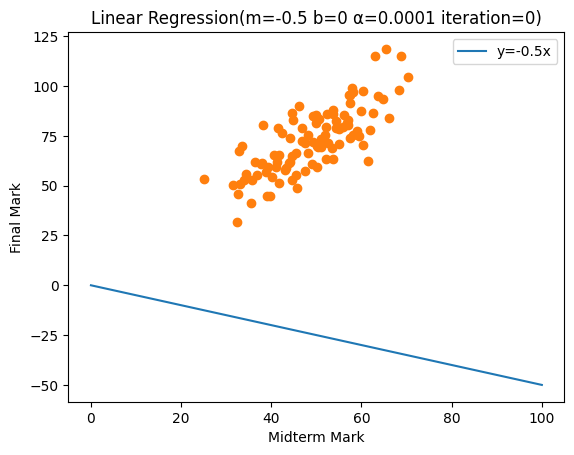

In [ ]:
#implementation
#initialize
x_normalized=manual_standardization(x)
y_normalized=manual_standardization(y)
m=-0.5
b=0
alpha=0.0001
#Initial Regression "Initial Regression: m=-0.5 b=0 α=0.0001 iteration #=0"
x_values=np.arange(0, 101, 1)
line_of_best_fit = m*x_values+b
plt.plot(x_values,line_of_best_fit)

plt.plot(x,y,'o')
plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.title("Linear Regression(m=-0.5 b=0 α=0.0001 iteration=0)")
plt.legend(["y=-0.5x"])
plt.show()


1.4785727560143909*x+ 0.04490536397288713


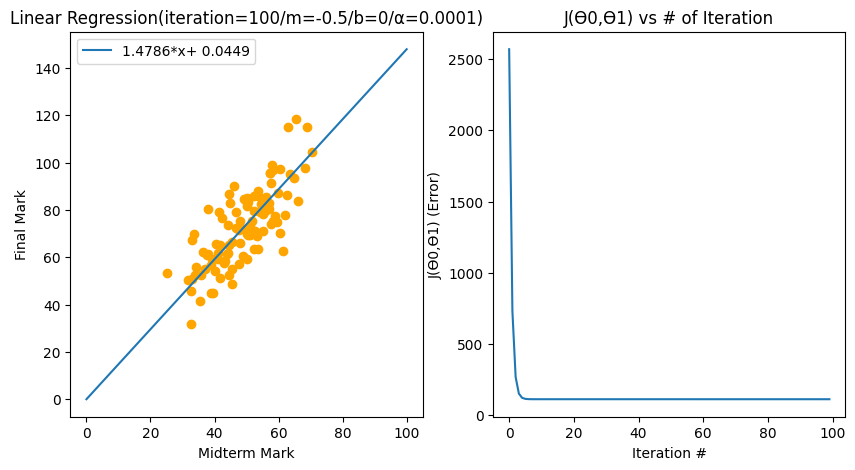

In [ ]:
#Linear Regression(m=-0.5 b=0 α=0.0001 iteration=100)
plot_graph_type_1(x,y,m,b,alpha,100,False,x_values)

1.4763433036607632*x+ 0.15833790708442705


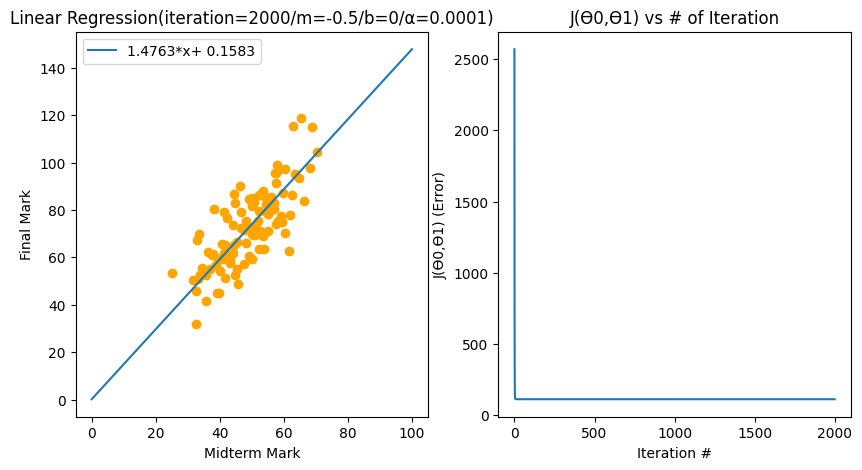

In [ ]:
#Linear Regression(m=-0.5 b=0 α=0.0001 iteration=2000)
plot_graph_type_1(x,y,m,b,alpha,2000,False,x_values)

### Standardized Linear Regression(m=-0.5 b=0 α=0.0001 )

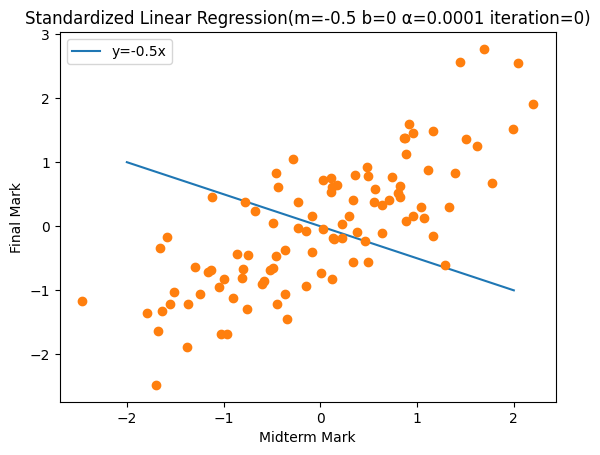

In [ ]:
#Normalized Regression(m=-0.5 b=0 α=0.0001 iteration=0"
x_values=np.arange(-2, 3, 1)
line_of_best_fit = m*x_values+b
plt.plot(x_values,line_of_best_fit)

plt.plot(x_normalized,y_normalized,'o')
plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.title("Standardized Linear Regression(m=-0.5 b=0 α=0.0001 iteration=0)")
plt.legend(["y=-0.5x"])
plt.show()


-0.4747809463889036*x+ -2.313704783318825e-18


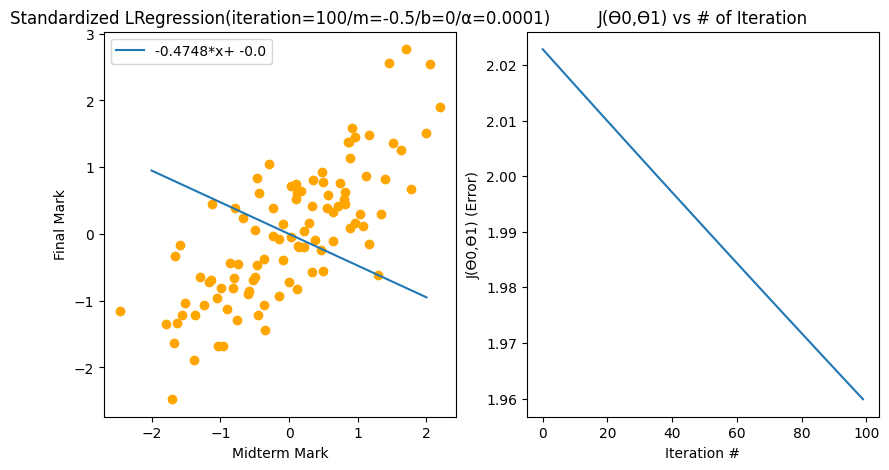

In [ ]:
#Normalized Linear Regression(m=-0.5 b=0 α=0.0001 iteration=100)
plot_graph_type_1(x_normalized,y_normalized,m,b,alpha,100,True,x_values)

-0.08012563486637699*x+ -1.8396839607248724e-17


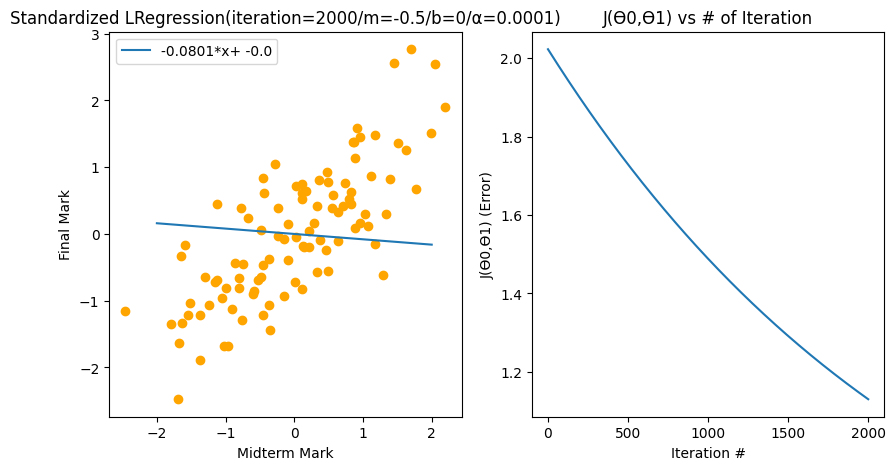

In [ ]:
#Normalized Linear Regression(m=-0.5 b=0 α=0.0001 iteration=2000)
plot_graph_type_1(x_normalized,y_normalized,m,b,alpha,2000,True,x_values)

### Verification of the above results using sklearn.linear_model.LinearRegression



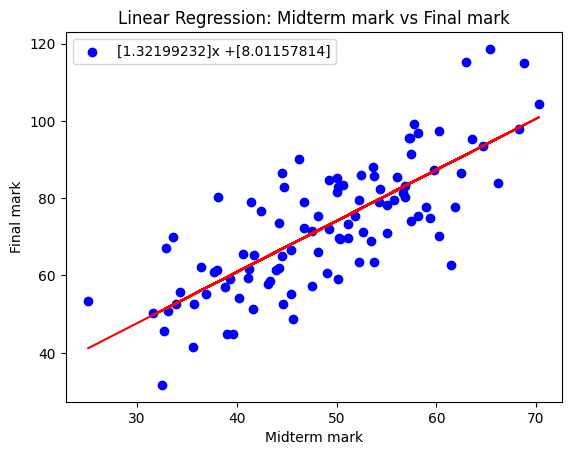

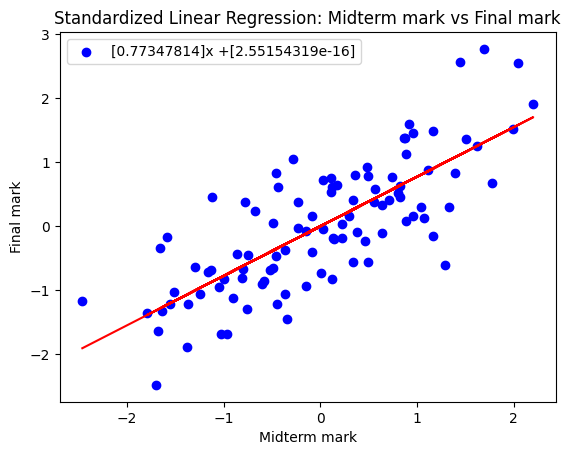

In [ ]:
def sklearn_regression(x,y,is_normalized):
    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(x, y)

    # Print the coefficients
    equation = str(model.coef_[0])+"x +"+str(model.intercept_)
    # Predict final marks for midterm marks
    predicted_final_marks = model.predict(x)

    # Plot the data and the linear regression line
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, predicted_final_marks, color='red', label='Linear Regression')
    plt.xlabel('Midterm mark')
    plt.ylabel('Final mark')
    plt.title('Linear Regression: Midterm mark vs Final mark')
    if(is_normalized):
      plt.title('Standardized Linear Regression: Midterm mark vs Final mark')
    plt.legend([equation])
    plt.show()

temp_x=x
temp_y=y
x_reshaped = np.array(temp_x).reshape(-1, 1)
y_reshaped = np.array(temp_y).reshape(-1, 1)
sklearn_regression(x_reshaped,y_reshaped,False)

print("\n")

temp_x_norm=x_normalized
temp_y_norm=y_normalized
x_reshaped_norm = np.array(temp_x_norm).reshape(-1, 1)
y_reshaped_norm = np.array(temp_y_norm).reshape(-1, 1)

sklearn_regression(x_reshaped_norm,y_reshaped_norm,True)


### Linear Regression/Standardized Linear Regression(m=-0.5 b=0 a=0.1)


<ipython-input-1-751b1c3a3d2c>:25: RuntimeWarning: overflow encountered in double_scalars
  error_value+=(y[i]-(theta0+theta1*x[i]))**2


-9.263695270230222e+269*x+ -1.8207268088133824e+268


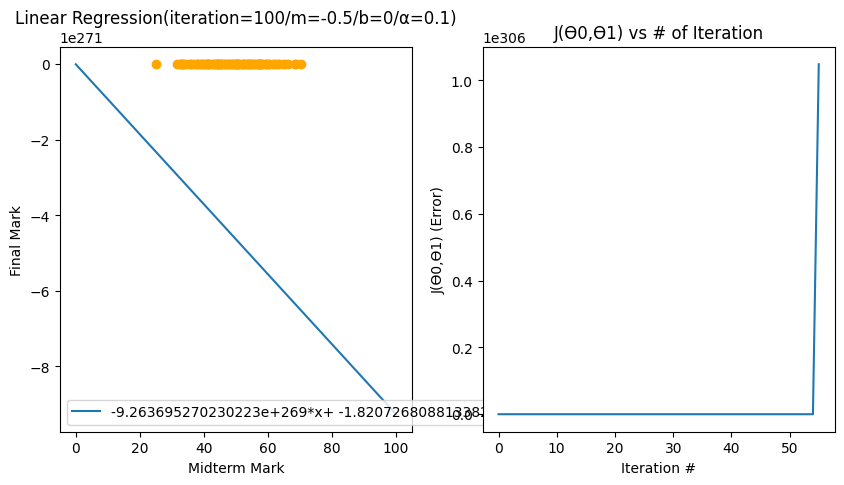

<ipython-input-1-751b1c3a3d2c>:33: RuntimeWarning: overflow encountered in double_scalars
  result+=((theta0+theta1*x[i])-y[i])
<ipython-input-1-751b1c3a3d2c>:40: RuntimeWarning: overflow encountered in double_scalars
  result+=((theta0+theta1*x[i])-y[i])*x[i]
<ipython-input-1-751b1c3a3d2c>:45: RuntimeWarning: invalid value encountered in double_scalars
  return theta0-alpha*cost_function_partial_derivative_wrt_theta0(theta0,theta1,x,y)
<ipython-input-1-751b1c3a3d2c>:49: RuntimeWarning: invalid value encountered in double_scalars
  return theta1-alpha*cost_function_partial_derivative_wrt_theta1(theta0,theta1,x,y)


nan*x+ nan


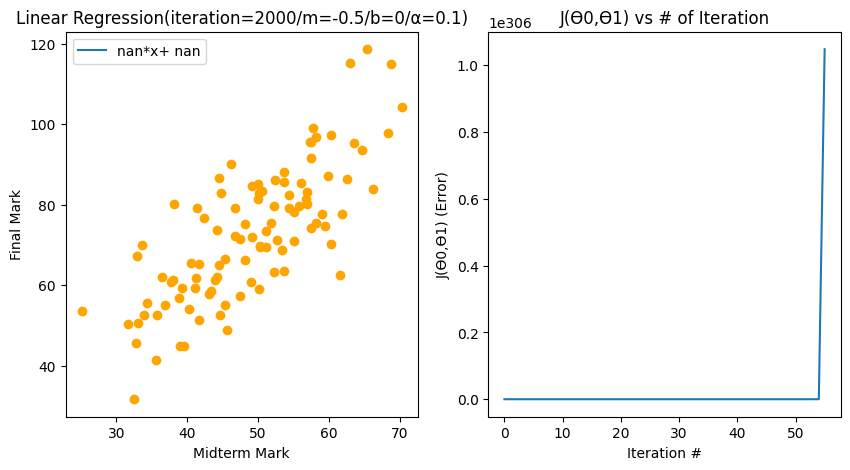



0.7734781433087615*x+ 2.6501023597802487e-16


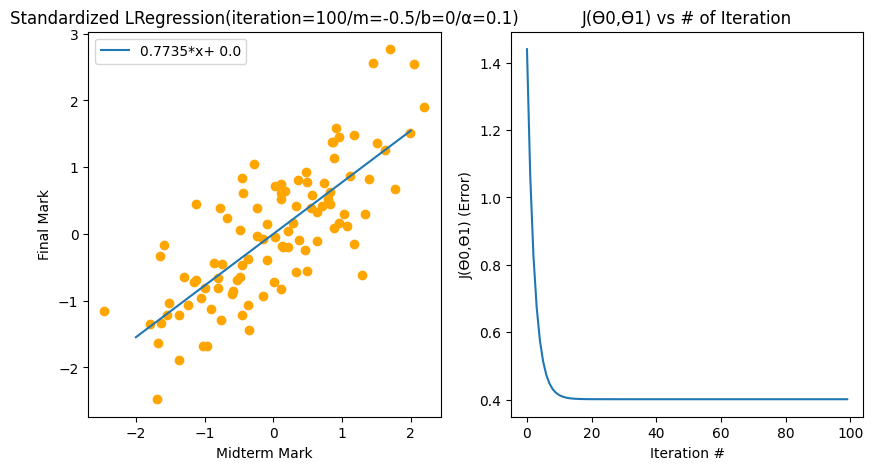



0.7734781435681735*x+ 1.904032487232142e-16


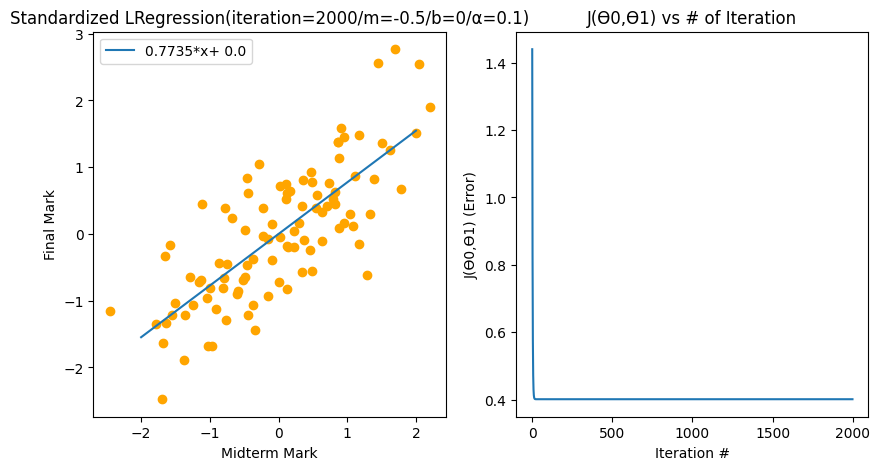

In [ ]:
alpha=0.1
x_values=np.arange(0, 101, 1)
plot_graph_type_1(x,y,m,b,alpha,100,False,x_values)
print("\n")
plot_graph_type_1(x,y,m,b,alpha,2000,False,x_values)
print("\n")
x_values=np.arange(-2, 3, 1)
plot_graph_type_1(x_normalized,y_normalized,m,b,alpha,100,True,x_values)
print("\n")
plot_graph_type_1(x_normalized,y_normalized,m,b,alpha,2000,True,x_values)

Effects of high learning rate:
- A high learning rate might cause the model to overlook the optimal solution. In extreme cases, it may lead to the complete divergence in the training process. This divergence becomes apparent when the loss function increases or oscillates.
- Data noise can potentially cause the model to overfit the training data.



### Effects of standardization

1.4763433036607632*x+ 0.15833790708442705


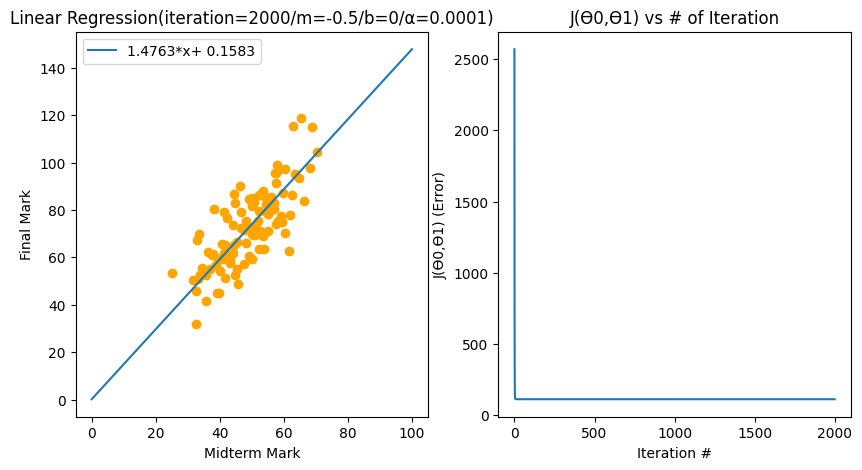

elapsed time with non-standardized input:  4.392505407333374


-0.08012563486637699*x+ -1.8396839607248724e-17


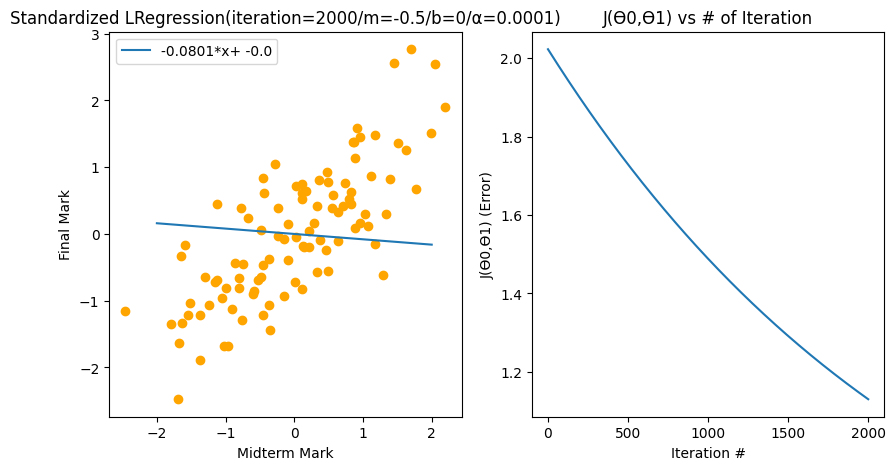

elapsed time with standardized input:  0.6133697032928467


In [ ]:

alpha=0.0001
x_values=np.arange(0, 101, 1)
#start timer
start_time = time.time()
# Code to be timed
#Linear Regression(m=-0.5 b=0 α=0.0001 iteration=2000)
plot_graph_type_1(x,y,m,b,alpha,2000,False,x_values)
# End timer
end_time = time.time()
# Calculate elapsed time
elapsed_time = end_time - start_time
print("elapsed time with non-standardized input: ", elapsed_time)

print("\n")

x_values=np.arange(-2, 3, 1)
# Start timer
start_time = time.time()
# Code to be timed
#Linear Regression(m=-0.5 b=0 α=0.0001 iteration=2000)
plot_graph_type_1(x_normalized,y_normalized,m,b,alpha,2000,True,x_values)
# End timer
end_time = time.time()
# Calculate elapsed time
elapsed_time = end_time - start_time
print("elapsed time with standardized input: ", elapsed_time)

Effects of standardization:
-  improve model performance: helps the algorithm converge more quickly during training by making sure the features are within a similar scale.
-  prevents sensitivity to the scale of input features
